In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
import warnings

In [3]:
#supress warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the data
file_path = '/kaggle/input/ondodata-dmy/Ondo_weatherdataDMY.csv'
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataframe
data.head()

,Date,Relative_Humidity,Max_Temp,Min_Temp,Precipitation,Soil_wetness
0,1982-01-01,79.75,31.35,21.21,0.10,0.72
1,1982-01-02,77.31,30.94,20.71,0.26,0.72
2,1982-01-03,83.69,30.48,22.44,1.33,0.72
3,1982-01-04,77.31,29.77,21.28,0.95,0.72
4,1982-01-05,64.94,29.82,18.30,0.00,0.71


In [7]:
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

In [8]:
# Keep only the 'Relative_Humidity' column
data_rh = data[['Relative_Humidity']]
data_max_temp = data[['Max_Temp']]
data_min_temp = data[['Min_Temp']]
data_precipitation = data[['Precipitation']]
data_soil_wetness = data[['Soil_wetness']]

In [9]:
# Display the first few rows to confirm changes
data_rh.head()

,Relative_Humidity
Date,
1982-01-01,79.75
1982-01-02,77.31
1982-01-03,83.69
1982-01-04,77.31
1982-01-05,64.94


In [10]:
# Display the first few rows to confirm changes
data_rh.tail()

,Relative_Humidity
Date,
2023-12-27,69.50
2023-12-28,62.56
2023-12-29,66.06
2023-12-30,71.69
2023-12-31,76.94


In [11]:
# Split the data into training and testing sets
train = data_rh.loc[:'2022-12-01']
test = data_rh.loc['2023-01-01':]

In [12]:
# Define the SARIMA model
model_rh = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [13]:
# Fit the model
sarima_rh_model = model_rh.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76330D+00    |proj g|=  8.96898D-02


 This problem is unconstrained.



At iterate    5    f=  2.63598D+00    |proj g|=  2.89390D-02

At iterate   10    f=  2.61545D+00    |proj g|=  2.52190D-03

At iterate   15    f=  2.61294D+00    |proj g|=  1.74769D-03

At iterate   20    f=  2.61266D+00    |proj g|=  1.74151D-03

At iterate   25    f=  2.61264D+00    |proj g|=  2.17903D-04

At iterate   30    f=  2.61264D+00    |proj g|=  6.97151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   3.591D-05   2.613D+00
  F =   2.6126369917513323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [51]:
# Forecast future values from 2024 to 2050
forecast_rh = sarima_rh_model.get_forecast(steps=10288)
forecasted_rh_values = forecast_rh.predicted_mean
forecast_rh_index = pd.date_range(start='2024-01-01', end='2050-12-31', freq='MS')

In [52]:
forecasted_rh_values.to_excel('forecasted_rh_values_to 2050.xlsx')

In [53]:
forecasted_rh_values.tail(50)

2050-12-13    90.124463
2050-12-14    90.121146
2050-12-15    90.171027
2050-12-16    90.133149
2050-12-17    90.046076
2050-12-18    89.934656
2050-12-19    89.908711
2050-12-20    90.094886
2050-12-21    90.083209
2050-12-22    89.996705
2050-12-23    90.116468
2050-12-24    90.034291
2050-12-25    90.130537
2050-12-26    90.127220
2050-12-27    90.177101
2050-12-28    90.139223
2050-12-29    90.052150
2050-12-30    89.940730
2050-12-31    89.914785
2051-01-01    90.100960
2051-01-02    90.089283
2051-01-03    90.002780
2051-01-04    90.122543
2051-01-05    90.040365
2051-01-06    90.136611
2051-01-07    90.133295
2051-01-08    90.183176
2051-01-09    90.145297
2051-01-10    90.058224
2051-01-11    89.946804
2051-01-12    89.920859
2051-01-13    90.107034
2051-01-14    90.095358
2051-01-15    90.008854
2051-01-16    90.128617
2051-01-17    90.046440
2051-01-18    90.142685
2051-01-19    90.139369
2051-01-20    90.189250
2051-01-21    90.151372
2051-01-22    90.064298
2051-01-23    89

In [54]:
# Combine the forecasted values with the original data
forecasted_rh_series = pd.Series(forecasted_rh_values, index=forecast_rh_index)
combined_rh_data = pd.concat([data_rh, forecasted_rh_series.rename('Forecasted_Relative_Humidity')])

In [55]:
# Save the forecasted data and the combined data to an Excel file
combined_rh_data.to_excel('combined_forecasted_rh_data.xlsx')

In [56]:
forecasted_rh_series.head(30)

2024-01-01    85.009748
2024-02-01    85.077341
2024-03-01    85.040119
2024-04-01    85.107712
2024-05-01    85.190253
2024-06-01    85.026664
2024-07-01    85.138448
2024-08-01    85.031090
2024-09-01    85.261748
2024-10-01    85.247636
2024-11-01    85.342000
2024-12-01    85.266331
2025-01-01    85.334493
2025-02-01    85.329961
2025-03-01    85.402743
2025-04-01    85.240569
2025-05-01    85.395236
2025-06-01    85.390704
2025-07-01    85.338534
2025-08-01    85.338898
2025-09-01    85.231540
2025-10-01    85.465514
2025-11-01    85.448086
2025-12-01    85.492569
2026-01-01    85.466781
2026-02-01    85.534943
2026-03-01    85.508829
2026-04-01    85.603193
2026-05-01    85.527523
2026-06-01    85.595686
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
forecasted_rh_series.tail(30)

2048-07-01    89.479087
2048-08-01    89.687117
2048-09-01    89.669688
2048-10-01    89.714171
2048-11-01    89.688383
2048-12-01    89.794424
2049-01-01    89.632251
2049-02-01    89.699844
2049-03-01    89.749125
2049-04-01    89.817288
2049-05-01    89.692993
2049-06-01    89.760586
2049-07-01    89.843127
2049-08-01    89.679537
2049-09-01    89.887567
2049-10-01    89.683964
2049-11-01    89.914622
2049-12-01    89.900510
2050-01-01    89.994874
2050-02-01    89.832701
2050-03-01    89.975364
2050-04-01    89.949576
2050-05-01    90.055616
2050-06-01    89.893443
2050-07-01    90.048110
2050-08-01    90.043577
2050-09-01    89.879988
2050-10-01    89.991772
2050-11-01    89.884414
2050-12-01    90.118388
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
combined_rh_data.head()

,Relative_Humidity,Forecasted_Relative_Humidity
1982-01-01,79.75,NaN
1982-01-02,77.31,NaN
1982-01-03,83.69,NaN
1982-01-04,77.31,NaN
1982-01-05,64.94,NaN


In [59]:
combined_rh_data.tail()

,Relative_Humidity,Forecasted_Relative_Humidity
2050-08-01 00:00:00,NaN,90.043577
2050-09-01 00:00:00,NaN,89.879988
2050-10-01 00:00:00,NaN,89.991772
2050-11-01 00:00:00,NaN,89.884414
2050-12-01 00:00:00,NaN,90.118388


In [17]:
# Save the model
import pickle

with open('/kaggle/working/sarima_rh_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
plt.plot(data_rh.index, data_rh['Forecasted_Relative_Humidity'])
plt.show()

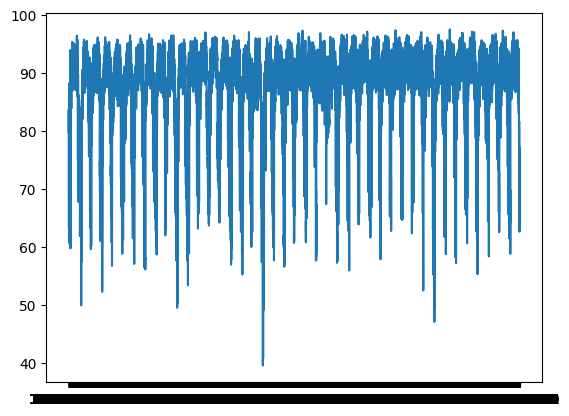

In [60]:
plt.plot(data_rh.index, data_rh['Relative_Humidity'])
plt.show()

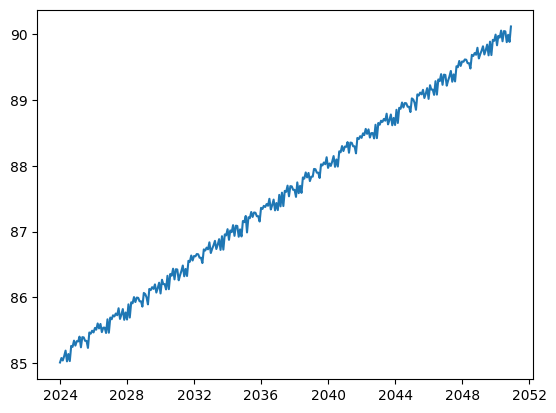

In [62]:

plt.plot(forecasted_rh_series)
plt.show()

## Model Evaluation

In [64]:
# Calculate MSE, RMSE, MAE, and MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
# Since the test set is empty, we'll use the training set for evaluation in this example
y_true = train['Relative_Humidity']
y_pred = sarima_rh_model.fittedvalues

In [66]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# Since we need to ensure all arrays contain the same number of samples, let's check
print(f'y_true size: {len(y_true)}, y_pred size: {len(y_pred)}')

MSE: 11.54474002347235
RMSE: 3.3977551447201653
MAE: 2.39129729669648
MAPE: 2.8774657345272066
y_true size: 14945, y_pred size: 14945
